In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from rdflib import Graph
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from networkx.algorithms import bipartite
from datetime import datetime

In [2]:
dep = pd.read_csv('data/18esima_Leg/final_dep_18.csv')
dep['id'] = dep['id'].astype(str)

In [3]:
vot_1 = pd.read_csv('data/18esima_Leg/eco/votazione-08-02-18.csv')
vot_1.columns = ['votazione', 'titolo', 'descrizione', 'numeroVotazione', 'cognome',
       'nome', 'eco_1', 'infoAssenza', 'deputato'] #change name of the columns 'Espressione' in a meaningful one
#extract id from the link
a = []
for i in range(vot_1.shape[0]):
    a.append(vot_1['deputato'][i][40:46])

vot_1['id'] = a
vot_1.drop('deputato', inplace= True, axis = 1)

xviii_leg_voti = pd.merge(dep[['Parlamentare', 'id', 'Partito']], vot_1[['id', 'eco_1']], how = 'left') #first merge


In [4]:
vot_3 = pd.read_csv('data/18esima_Leg/eco/votazione-03-08-22.csv')
vot_3.columns = ['votazione', 'titolo', 'descrizione', 'numeroVotazione', 'cognome',
       'nome', 'eco_2', 'infoAssenza', 'deputato'] #change name of the columns 'Espressione' in a meaningful one
#extract id from the link
a = []
for i in range(vot_3.shape[0]):
    a.append(vot_3['deputato'][i][40:46])

vot_3['id'] = a
vot_3.drop('deputato', inplace= True, axis = 1)

xviii_leg_voti = pd.merge(xviii_leg_voti, vot_3[['id', 'eco_2']], how = 'left') #first merge



In [5]:
vot_3 = pd.read_csv('data/18esima_Leg/eco/votazione-10-12-19.csv')
vot_3.columns = ['votazione', 'titolo', 'descrizione', 'numeroVotazione', 'cognome',
       'nome', 'eco_3', 'infoAssenza', 'deputato'] #change name of the columns 'Espressione' in a meaningful one
#extract id from the link
a = []
for i in range(vot_3.shape[0]):
    a.append(vot_3['deputato'][i][40:46])

vot_3['id'] = a
vot_3.drop('deputato', inplace= True, axis = 1)

xviii_leg_voti = pd.merge(xviii_leg_voti, vot_3[['id', 'eco_3']], how = 'left') #first merge

In [6]:
vot_3 = pd.read_csv('data/18esima_Leg/eco/votazione-24-10-19.csv')
vot_3.columns = ['votazione', 'titolo', 'descrizione', 'numeroVotazione', 'cognome',
       'nome', 'eco_4', 'infoAssenza', 'deputato'] #change name of the columns 'Espressione' in a meaningful one
#extract id from the link
a = []
for i in range(vot_3.shape[0]):
    a.append(vot_3['deputato'][i][40:46])

vot_3['id'] = a
vot_3.drop('deputato', inplace= True, axis = 1)

xviii_leg_voti = pd.merge(xviii_leg_voti, vot_3[['id', 'eco_4']], how = 'left') #first merge

In [9]:
pd.set_option('display.max_rows', None)
xviii_leg_voti

,Parlamentare,id,Partito,eco_1,eco_2,eco_3,eco_4
0,BASINI GIUSEPPE,200049,(LEGA),Non ha votato,Non ha votato,Contrario,Non ha votato
1,BERSANI PIER LUIGI,300026,(MISTO),Favorevole,Non ha votato,Non ha votato,Favorevole
2,LETTA ENRICO,300127,(PD),Favorevole,Non ha votato,NaN,NaN
3,MINNITI DOMENICO,300146,(PD),NaN,NaN,Favorevole,Non ha votato
4,FRANCESCHINI DARIO,300246,(PD),Non ha votato,Non ha votato,Non ha votato,Non ha votato
5,ZANETTIN PIERANTONIO,300271,(FI),Non ha votato,Non ha votato,Contrario,Astensione
6,MILANATO LORENA,300296,(FI),Non ha votato,Non ha votato,Contrario,Non ha votato
7,ORSINI ANDREA GIORGIO FELICE MARIA,300299,(FI),Non ha votato,Non ha votato,Non ha votato,Non ha votato
8,SANTELLI JOLE,300306,(FI),NaN,NaN,Non ha votato,Astensione
9,CIRIELLI EDMONDO,300319,(FDI),Non ha votato,Non ha votato,Non ha votato,Non ha votato


In [7]:
np.unique(xviii_leg_voti['eco_1'])

TypeError: '<' not supported between instances of 'float' and 'str'

In [17]:
np.unique(vot_1['voto_1'], return_counts= True)

(array(['Astensione', 'Contrario', 'Favorevole', 'Non ha votato'],
       dtype=object),
 array([  6,   1, 467, 154], dtype=int64))

In [22]:
sum([  6,   1, 467, 154])

628

In [7]:
import missingno as msno

<Axes: >

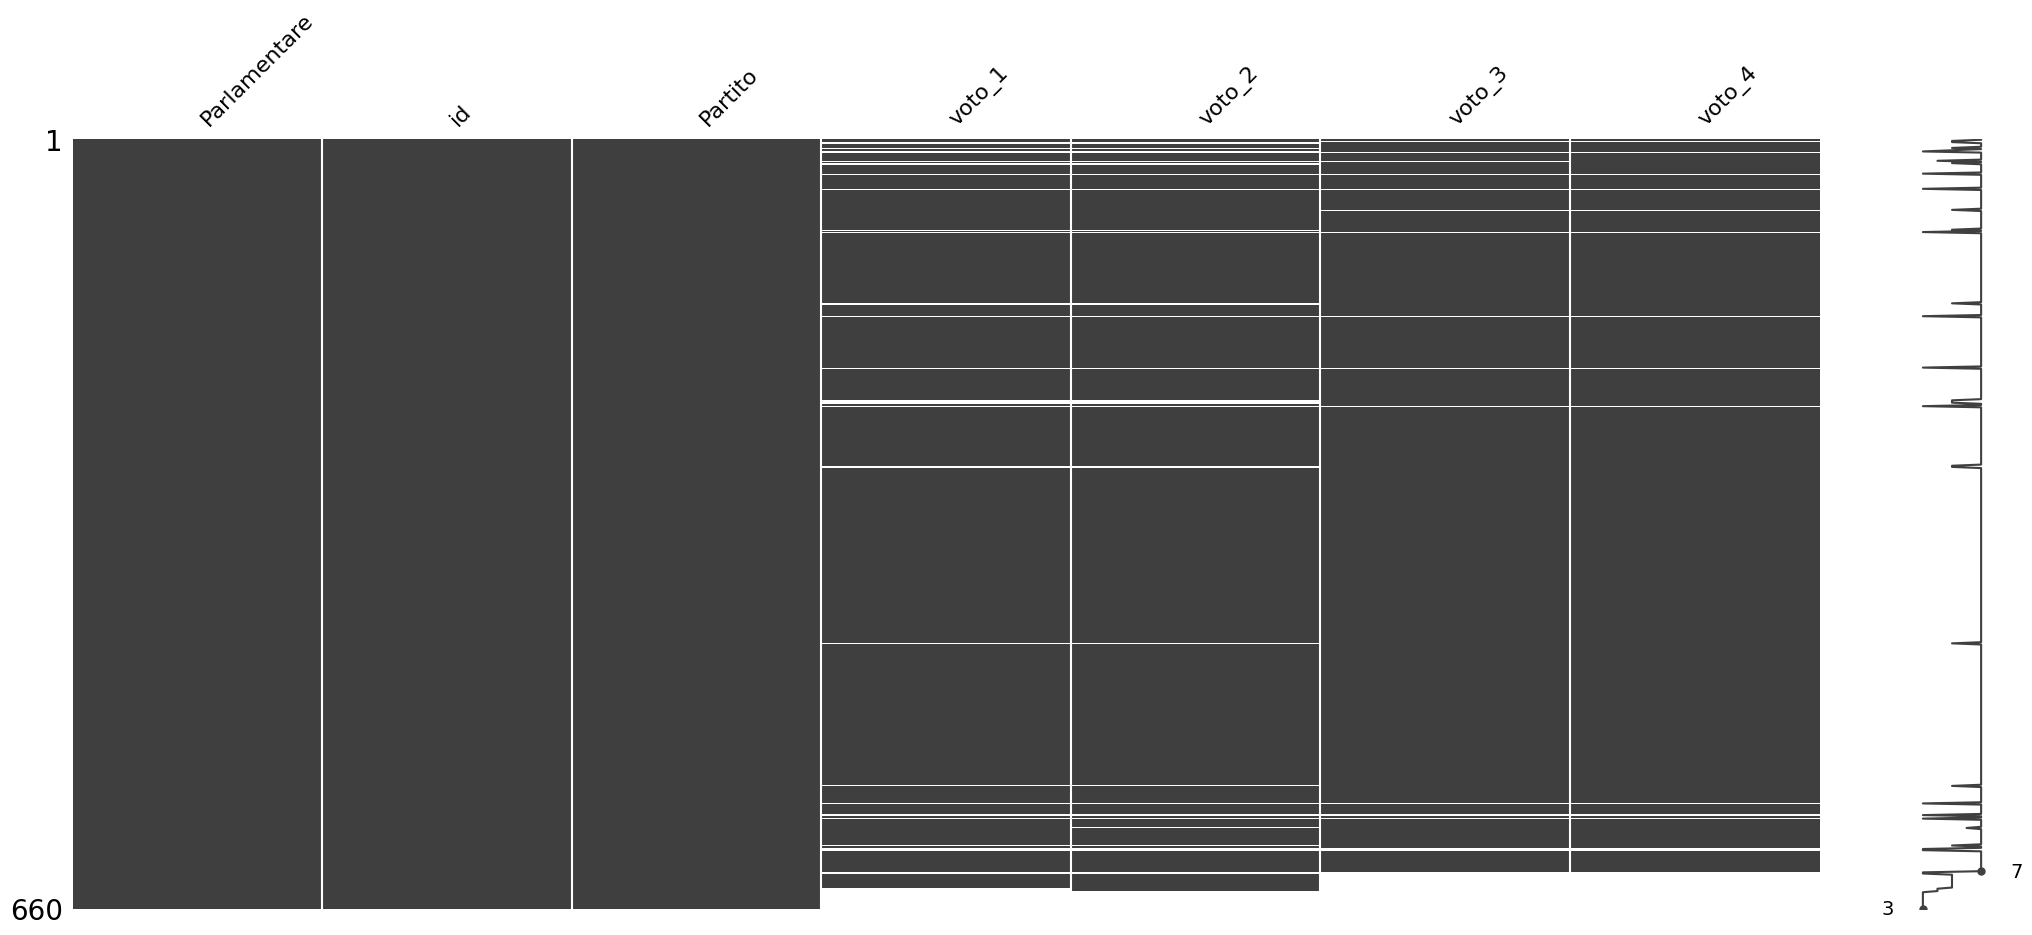

In [11]:
msno.matrix(merged)

In [43]:
cosine_similarity(merged[['voto_1', 'voto_2']])

array([[1.        , 0.70710678, 0.70710678, ..., 0.        , 0.        ,
        0.70710678],
       [0.70710678, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70710678, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])